In [1]:
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple
from EstrategiaParticionado import ValidacionCruzada
from Clasificador import ClasificadorNaiveBayes,Clasificador
from Verificador import Verificador_GaussianNB, Verificador_Multinominal
from MatrizConfusion import MatrizConfusion

from tabulate import tabulate
import sys

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [2]:
"""
Apartado 1 => Particionado

Análisis de las dos estrategias de particionado propuestas: simple, y
cruzada, para los conjuntos propuestos: german y tic-tac-toe. El análisis
consiste en una descripción de los índices de train y test devueltos por
cada uno de los métodos de particionado, junto con un comentario
sobre las ventajas/desventajas de cada uno de ellos.
"""

'\nApartado 1 => Particionado\n\nAnálisis de las dos estrategias de particionado propuestas: simple, y\ncruzada, para los conjuntos propuestos: german y tic-tac-toe. El análisis\nconsiste en una descripción de los índices de train y test devueltos por\ncada uno de los métodos de particionado, junto con un comentario\nsobre las ventajas/desventajas de cada uno de ellos.\n'

In [3]:
"""
En cuanto al metodo de VALIDACIÓN SIMPLE es el mas sencillo de implementar, puesto que se basa en una division 
aleatoria en dos grupos. Sin embargo, aún siendo el modo de validación más sencillo, trae consigo una serie de
inconvenientes:
    
    1) El ratio de error, es altamente variable dependiendo de las instancias del dataset escogido, para 
    entrenamiento, y test.
    
    2) Al segregar una serie de instancias para entrenamiento y test, estamos provocando que durante el entrenamiento
    el clasificador, no contemple todas las posibles situaciones de un contexto, por lo tanto esto produce
    una sobrestimación del ratio de error.
    
Por su parte, el método de VALIDACIÓN CRUZADA es más complejo de implementar, puesto que se trata de un proceso 
iterativo. Éste, busca dividir todo el conjunto de datos en k grupos, de tal modo que, solo uno de esos bloques se usa 
como test, mientras que el resto de divisiones se usan como entrenamiento. Por cada iteración, se turnan los "roles", de 
tal modo, que todas las subdivisiones son testadas y todas han sido usadas como entrenamiento. 

En un escenario, en el que el conjunto de datos es pequeño, es muy superior a validacón simple y otra ventaja 
respecto a validación simple es, que prueba y valida todas las instancias de datos. Por otra parte, podemos decir que
el ratio de error en este tipo de validacion es mucho más preciso y real, puesto que se entrena con prácticamente todo
el conjunto de datos maximizando asi el modelo sin sobrestimar en las predicciones. A su vez, es de gran
utilidad el que el ratio de error sea calculado como un promedio de las estimaciones de cada iteración.

Respecto los inconvenientes, principalmente encontramos uno, que es el coste computacional que requiere este método.
La identificación de bloques, el número de iteraciones y sobre todo que en el caso de usar un dataset 
excesivamente grande, debemos contemplar la posibilidad de que se vuelva algo lento y costoso (en comparación con
validación simple) y por tanto no sea tan útil como en otras circunstancias.
"""

'\nEn cuanto al metodo de VALIDACIÓN SIMPLE es el mas sencillo de implementar, puesto que se basa en una division \naleatoria en dos grupos. Sin embargo, aún siendo el modo de validación más sencillo, trae consigo una serie de\ninconvenientes:\n    \n    1) El ratio de error, es altamente variable dependiendo de las instancias del dataset escogido, para \n    entrenamiento, y test.\n    \n    2) Al segregar una serie de instancias para entrenamiento y test, estamos provocando que durante el entrenamiento\n    el clasificador, no contemple todas las posibles situaciones de un contexto, por lo tanto esto produce\n    una sobrestimación del ratio de error.\n    \nPor su parte, el método de VALIDACIÓN CRUZADA es más complejo de implementar, puesto que se trata de un proceso \niterativo. Éste, busca dividir todo el conjunto de datos en k grupos, de tal modo que, solo uno de esos bloques se usa \ncomo test, mientras que el resto de divisiones se usan como entrenamiento. Por cada iteración, s

In [4]:
fileName = "ConjuntosDatos/tic-tac-toe.data"
datos_tic = Datos(fileName)
    
    # Probamos con 75 porciento y 10 iteraciones (Validacion Simple)
validacion_simple_tic = ValidacionSimple(75,10)
aux_simple_tic = validacion_simple_tic.creaParticiones(datos_tic)

print("######## VALIDACION SIMPLE TIC-TAC-TOE ########")
print("Porcentaje entrenamiento: " + str(validacion_simple_tic.porcentaje))
print("Numero iteraciones: " + str(validacion_simple_tic.numEjecuciones) + " <=> Numero particiones: " + str(len(aux_simple_tic)))
print("Indices Totales(Primera Iteracion/Particion) => " + str(datos_tic.cantidadDatos))
print("\tNum Indices Train: " + str(len(aux_simple_tic[0].indicesTrain)))
print("\tNum Indices Test: " + str(len(aux_simple_tic[0].indicesTest)))

    # Probamos con 10 k-iteraciones
validacion_cruzada_tic = ValidacionCruzada(6)
aux_cruzada_tic = validacion_cruzada_tic.creaParticiones(datos_tic)

print("\n######## VALIDACION CRUZADA TIC-TAC-TOE ########")
print("Numero Carpetas: " + str(validacion_cruzada_tic.numParticiones) + " <=> Numero particiones: " + str(len(aux_cruzada_tic)))
print("Indices Totales(Primera Iteracion/Particion) => " + str(datos_tic.cantidadDatos))
print("\tNum Indices Train: " + str(len(aux_cruzada_tic[0].indicesTrain)))
print("\tNum Indices Test: " + str(len(aux_cruzada_tic[0].indicesTest)))

fileName = "ConjuntosDatos/german.data"
datos_ger = Datos(fileName)

    # Probamos con 75 porciento y 10 iteraciones (Validacion Simple)
validacion_simple_ger = ValidacionSimple(75,10)
aux_simple_ger = validacion_simple_ger.creaParticiones(datos_ger)

print("\n######## VALIDACIONES GERMAN ########")
print("Porcentaje entrenamiento: " + str(validacion_simple_ger.porcentaje))
print("Numero iteraciones: " + str(validacion_simple_ger.numEjecuciones) + " <=> Numero particiones: " + str(len(aux_simple_ger)))
print("Indices Totales(Primera Iteracion/Particion) => " + str(datos_ger.cantidadDatos))
print("\tNum Indices Train: " + str(len(aux_simple_ger[0].indicesTrain)))
print("\tNum Indices Test: " + str(len(aux_simple_ger[0].indicesTest)))

# Probamos con 10 k-iteraciones
validacion_cruzada_ger = ValidacionCruzada(6)
aux_cruzada_ger = validacion_cruzada_ger.creaParticiones(datos_ger)
print("\n######## VALIDACION CRUZADA GERMAN ########")
print("Numero Carpetas: " + str(validacion_cruzada_ger.numParticiones) + " <=> Numero particiones: " + str(len(aux_cruzada_ger)))
print("Indices Totales(Primera Iteracion/Particion) => " + str(datos_ger.cantidadDatos))
print("\tNum Indices Train: " + str(len(aux_cruzada_ger[0].indicesTrain)))
print("\tNum Indices Test: " + str(len(aux_cruzada_ger[0].indicesTest)))

######## VALIDACION SIMPLE TIC-TAC-TOE ########
Porcentaje entrenamiento: 75
Numero iteraciones: 10 <=> Numero particiones: 10
Indices Totales(Primera Iteracion/Particion) => 958
	Num Indices Train: 719
	Num Indices Test: 239

######## VALIDACION CRUZADA TIC-TAC-TOE ########
Numero Carpetas: 6 <=> Numero particiones: 6
Indices Totales(Primera Iteracion/Particion) => 958
	Num Indices Train: 798
	Num Indices Test: 160

######## VALIDACIONES GERMAN ########
Porcentaje entrenamiento: 75
Numero iteraciones: 10 <=> Numero particiones: 10
Indices Totales(Primera Iteracion/Particion) => 1000
	Num Indices Train: 750
	Num Indices Test: 250

######## VALIDACION CRUZADA GERMAN ########
Numero Carpetas: 6 <=> Numero particiones: 6
Indices Totales(Primera Iteracion/Particion) => 1000
	Num Indices Train: 833
	Num Indices Test: 167


In [5]:
"""
Como vemos, hemos representado dos particiones para cada dataset empleado en la práctica.
Para las validaciones simples hemos almacenado el numero de iteraciones que para ambas pruebas ha sido de 10.
En cada iteración, que corresponde a su vez a una particion, almacenamos de modo aleatorio el número de indices 
especificado por el usuario en forma de porcentaje (para nuestro ejemplo, se trata de un 0.75).

En cuanto a la validación cruzada, preparamos a priori cada bloque con el número de indices que le corresponde.
Para el caso de tic-tac-toe.data, estamos usando un total de 958 entradas en el dataset que se reparten entre 6 bloques
con 158-160 indices. Como vemos, el número de indices varia, dependiendo de la situación y de si el total de indices, es
divisible (con resto 0) entre el número de bloques (Kfolds) que escogio el usuario.

Tras ello, procedemos a insertar los indices de cada bloque en los array's de indicesTrain, e indicesTest, y tenemos en
cuenta, que bloque ha sido de test en cada iteración, para en cada una, escoger uno diferente y asignar el resto de
bloques como datos de train.
"""

"\nComo vemos, hemos representado dos particiones para cada dataset empleado en la práctica.\nPara las validaciones simples hemos almacenado el numero de iteraciones que para ambas pruebas ha sido de 10.\nEn cada iteración, que corresponde a su vez a una particion, almacenamos de modo aleatorio el número de indices \nespecificado por el usuario en forma de porcentaje (para nuestro ejemplo, se trata de un 0.75).\n\nEn cuanto a la validación cruzada, preparamos a priori cada bloque con el número de indices que le corresponde.\nPara el caso de tic-tac-toe.data, estamos usando un total de 958 entradas en el dataset que se reparten entre 6 bloques\ncon 158-160 indices. Como vemos, el número de indices varia, dependiendo de la situación y de si el total de indices, es\ndivisible (con resto 0) entre el número de bloques (Kfolds) que escogio el usuario.\n\nTras ello, procedemos a insertar los indices de cada bloque en los array's de indicesTrain, e indicesTest, y tenemos en\ncuenta, que bloque

In [6]:
"""
Apartado 2 => Naive Bayes

Tabla con los resultados de la ejecución para los conjuntos de datos
analizados (tic-tac-toe y german). Considerar los dos tipos de
particionado.
Los resultados se refieren a las tasas de error/acierto y deben incluirse
tanto con la corrección de Laplace como sin ella. Se debe incluir tanto
el promedio de error para las diferentes particiones como su desviación
típica. Es importante mostrar todos los resultados agrupados en una
tabla para facilitar su evaluación.
Breve análisis de los resultados anteriores.
"""

'\nApartado 2 => Naive Bayes\n\nTabla con los resultados de la ejecución para los conjuntos de datos\nanalizados (tic-tac-toe y german). Considerar los dos tipos de\nparticionado.\nLos resultados se refieren a las tasas de error/acierto y deben incluirse\ntanto con la corrección de Laplace como sin ella. Se debe incluir tanto\nel promedio de error para las diferentes particiones como su desviación\ntípica. Es importante mostrar todos los resultados agrupados en una\ntabla para facilitar su evaluación.\nBreve análisis de los resultados anteriores.\n'

In [7]:
"""
El objetivo de este apartado es crear el modelos Naive Bayes y que se entrene con los ejemplos indexados  por 'train'
generados en el apartado anterior y que clasifique aquellos, marcados por los indices 'test' tambien 
porporcionados por los validadores.

El modo de clasificación de Naive Bayes, trae consigo una premisa que hace que su implementación sea más sencilla.
Esta es la suposición de que los atributos del dataset son independientes unos de otros dada la clase. 
Como ventaja, la independencia de atributos, nos trae que se puede crear un modelo potente, con relativamente 
poco coste computacional y que es facilmente escalable en cuanto a atributos se refiere. 
Esto quiere decir que el coste computacional es lineal.

Como inconveniente, la premisa de la que se parte es demasiado optimista, pues en muchas ocasiones ciertos atributos 
del dataset pueden estar relacionados con otros. 
Por ejemplo en un dataset con un atributo "nubes" (sí/no) y otro "lluvia" (sí/no) hay una clara relación 
puesto que si no hay nubes tampoco hay lluvia. 
Con esto, se quiere decir que un modelo que tenga en cuentas esta dependecia de atributos, será más preciso que NB, 
o lo que es lo mismo, NB pierde precisión, al suponer la independecia entre atributos.
"""

'\nEl objetivo de este apartado es crear el modelos Naive Bayes y que se entrene con los ejemplos indexados  por \'train\'\ngenerados en el apartado anterior y que clasifique aquellos, marcados por los indices \'test\' tambien \nporporcionados por los validadores.\n\nEl modo de clasificación de Naive Bayes, trae consigo una premisa que hace que su implementación sea más sencilla.\nEsta es la suposición de que los atributos del dataset son independientes unos de otros dada la clase. \nComo ventaja, la independencia de atributos, nos trae que se puede crear un modelo potente, con relativamente \npoco coste computacional y que es facilmente escalable en cuanto a atributos se refiere. \nEsto quiere decir que el coste computacional es lineal.\n\nComo inconveniente, la premisa de la que se parte es demasiado optimista, pues en muchas ocasiones ciertos atributos \ndel dataset pueden estar relacionados con otros. \nPor ejemplo en un dataset con un atributo "nubes" (sí/no) y otro "lluvia" (sí/n

In [8]:
# Creacion del clasificador
Clasificador = ClasificadorNaiveBayes()

#       Sin Laplace
#  TIC-TAC-TOE
# Validacion con validacion simple
media_error1, media_tp1, media_fp1, media_tn1, media_fn1 = Clasificador.validacion(validacion_simple_tic,datos_tic,False)

# Validacion con validacion cruzada
media_error2, media_tp2, media_fp2, media_tn2, media_fn2 = Clasificador.validacion(validacion_cruzada_tic,datos_tic,False)

#  GERMAN  
# Validacion con validacion simple
media_error3, media_tp3, media_fp3, media_tn3, media_fn3 = Clasificador.validacion(validacion_simple_ger,datos_ger,False)

# Validacion con validacion cruzada
media_error4, media_tp4, media_fp4, media_tn4, media_fn4 = Clasificador.validacion(validacion_cruzada_ger,datos_ger,False)

# Impresion de los resultados
resultados_sin = [[round(media_error1, 3), round(media_error3, 3)], [round(media_error2, 3), 
round(media_error4, 3)]]

print("Sin Laplace")
print(tabulate(resultados_sin, headers=['Tasa de error', 'Tic-Tac-Toe', 'German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))

#       Con Laplace
#  TIC-TAC-TOE
# Validacion con validacion simple
media_error1, media_tp1, media_fp1, media_tn1, media_fn1 = Clasificador.validacion(validacion_simple_tic,datos_tic,True)

# Validacion con validacion cruzada
media_error2, media_tp2, media_fp2, media_tn2, media_fn2 = Clasificador.validacion(validacion_cruzada_tic,datos_tic,True)

#  GERMAN  
# Validacion con validacion simple
media_error3, media_tp3, media_fp3, media_tn3, media_fn3 = Clasificador.validacion(validacion_simple_ger,datos_ger,True)

# Validacion con validacion cruzada
media_error4, media_tp4, media_fp4, media_tn4, media_fn4 = Clasificador.validacion(validacion_cruzada_ger,datos_ger,True)

# Impresion de los resultados
resultados_con = [[round(media_error1, 3), round(media_error3, 3)], [round(media_error2, 3), 
round(media_error4, 3)]]
print("Con Laplace")
print(tabulate(resultados_con, headers=['Tasa de error', 'Tic-Tac-Toe', 'German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))


Sin Laplace
╒═════════════════╤═══════════════╤══════════╕
│ Tasa de error   │   Tic-Tac-Toe │   German │
╞═════════════════╪═══════════════╪══════════╡
│ Val. Simple     │         0.298 │    0.273 │
├─────────────────┼───────────────┼──────────┤
│ Val. Cruzada    │         0.296 │    0.254 │
╘═════════════════╧═══════════════╧══════════╛
Con Laplace
╒═════════════════╤═══════════════╤══════════╕
│ Tasa de error   │   Tic-Tac-Toe │   German │
╞═════════════════╪═══════════════╪══════════╡
│ Val. Simple     │         0.298 │    0.273 │
├─────────────────┼───────────────┼──────────┤
│ Val. Cruzada    │         0.296 │    0.254 │
╘═════════════════╧═══════════════╧══════════╛


In [9]:
"""
 Como se puede observar en las tablas generadas, se cumple lo dicho en el apartado anterior, 
 siendo el error medio de la validación cruzada más bajo que el de la simple. 
 De lo cual se puede deducir que la validación cruzada es más precisa.

 Del mismo modo, podemos observar que en ambos tipos de validación, el error medio de 'german.data' es inferior 
 al de tic-tac-toe'. 
 Esto se debe a que, al tener más ejemplos con los que entrenar, el modelo es más preciso y clasifica mejor los 
 ejemplos de train.

 Por último, en estos datasets pequeños, no se aprecia una gran diferencia entre la ejecución sin y con 
 la correccion de Laplace. Esto se debe a que para mostrar los datos, se han redondeado a 3 decimales, 
 sin embargo, si nos fijasemos en más decimales, veríamos que con la corrección el error es sutilmente más pequeño.
"""

"\n Como se puede observar en las tablas generadas, se cumple lo dicho en el apartado anterior, \n siendo el error medio de la validación cruzada más bajo que el de la simple. \n De lo cual se puede deducir que la validación cruzada es más precisa.\n\n Del mismo modo, podemos observar que en ambos tipos de validación, el error medio de 'german.data' es inferior \n al de tic-tac-toe'. \n Esto se debe a que, al tener más ejemplos con los que entrenar, el modelo es más preciso y clasifica mejor los \n ejemplos de train.\n\n Por último, en estos datasets pequeños, no se aprecia una gran diferencia entre la ejecución sin y con \n la correccion de Laplace. Esto se debe a que para mostrar los datos, se han redondeado a 3 decimales, \n sin embargo, si nos fijasemos en más decimales, veríamos que con la corrección el error es sutilmente más pequeño.\n"

In [10]:
"""
Aparto 3 => Scikit-Learn
Incluir los mismos resultados que en el apartado 2 pero usando los
métodos del paquete scikit-learn. Comparar y analizar los resultados. 
"""

'\nAparto 3 => Scikit-Learn\nIncluir los mismos resultados que en el apartado 2 pero usando los\nmétodos del paquete scikit-learn. Comparar y analizar los resultados. \n'

In [11]:
""" 
 Para llevar a cabo la verificación de nuestro clasificador implementado usamos la libreria scikitlearn, 
 de la cual usamos varias funciones de clasificación, varias de metodos de validación y varias de preprocesado de datos.
 Para empezar, hemos desarrollado dos funciones propias de la clase abstracta Verificador, 
 las cuales se encargan de llevar a cabo un preprocesado similar al que desarrollamos en la primera entrega, 
 y por otra parte, hemos desarrollado un preprocesado OneHot que nos ha proporcionado muy buenos resultados. 
 
 Por otro lado, implementamos una función muy pequeña, que se encarga de separar los datos de entrada y 
 los de clasificación y los almacena en estructuras diferentes. 
 Por último, como funciones abstractas desarrollamos dos métodos de validación (validación simple y validación cruzada).

 En cuanto a las subclases que encontramos, hemos decidido implementar tanto el clasififcador GaussianNB 
 como el MultinominalNB. 
 Ambas se pueden configurar mediante hiperparametros, y aunque ambas nos han devuelto resultados muy buenos,
 en la siguiente implementación hemos decidido usar únicamente el GaussianNB, puesto que es el que mejor ha 
 respondido a los datasets proporcionados.
"""

' \n Para llevar a cabo la verificación de nuestro clasificador implementado usamos la libreria scikitlearn, \n de la cual usamos varias funciones de clasificación, varias de metodos de validación y varias de preprocesado de datos.\n Para empezar, hemos desarrollado dos funciones propias de la clase abstracta Verificador, \n las cuales se encargan de llevar a cabo un preprocesado similar al que desarrollamos en la primera entrega, \n y por otra parte, hemos desarrollado un preprocesado OneHot que nos ha proporcionado muy buenos resultados. \n \n Por otro lado, implementamos una función muy pequeña, que se encarga de separar los datos de entrada y \n los de clasificación y los almacena en estructuras diferentes. \n Por último, como funciones abstractas desarrollamos dos métodos de validación (validación simple y validación cruzada).\n\n En cuanto a las subclases que encontramos, hemos decidido implementar tanto el clasififcador GaussianNB \n como el MultinominalNB. \n Ambas se pueden co

In [12]:
vgNB = Verificador_GaussianNB()
# GaussianNB => Sin Preprocesado
#     TIC-TAC-TOE => Validacion Simple (TRAIN=0.75)
tic_simple_sin = vgNB.clasificate(prepro=False,tipo_validacion=1,porcentaje=0.75,folds=3,archivo="ConjuntosDatos/tic-tac-toe.data")
#     TIC-TAC-TOE => Validacion Cruzada (KFOLDS = 6)
tic_cruzada_sin = vgNB.clasificate(prepro=False,tipo_validacion=2,porcentaje=0.75,folds=6,archivo="ConjuntosDatos/tic-tac-toe.data")

#     GERMAN => Validacion Simple (TRAIN=0.75)
german_simple_sin = vgNB.clasificate(prepro=False,tipo_validacion=1,porcentaje=0.75,folds=3,archivo="ConjuntosDatos/german.data")
#     GERMAN => Validacion Cruzada (KFOLDS = 6)
german_cruzada_sin = vgNB.clasificate(prepro=False,tipo_validacion=2,porcentaje=0.75,folds=6,archivo="ConjuntosDatos/german.data")

# Impresion de los resultados
resultados_sk_sin = [[round(tic_simple_sin, 3), round(german_simple_sin, 3)], [round(tic_cruzada_sin, 3), round(german_cruzada_sin, 3)]]



# GaussianNB => Con Preprocesado

#     TIC-TAC-TOE => Validacion Simple (TRAIN=0.75)
tic_simple_con = vgNB.clasificate(prepro=True,tipo_validacion=1,porcentaje=0.75,folds=3,archivo="ConjuntosDatos/tic-tac-toe.data")
#     TIC-TAC-TOE => Validacion Cruzada (KFOLDS = 6)
tic_cruzada_con = vgNB.clasificate(prepro=True,tipo_validacion=2,porcentaje=0.75,folds=6,archivo="ConjuntosDatos/tic-tac-toe.data")

#     GERMAN => Validacion Simple (TRAIN=0.75)
german_simple_con = vgNB.clasificate(prepro=True,tipo_validacion=1,porcentaje=0.75,folds=3,archivo="ConjuntosDatos/german.data")
#     GERMAN => Validacion Cruzada (KFOLDS = 6)
german_cruzada_con = vgNB.clasificate(prepro=True,tipo_validacion=2,porcentaje=0.75,folds=6,archivo="ConjuntosDatos/german.data")

# Impresion de los resultados
resultados_sk_con = [[round(tic_simple_con, 3), round(german_simple_con, 3)], [round(tic_cruzada_con, 3), round(german_cruzada_con, 3)]]

# Impresion de las tablas
print("Practica 1:")
print(" Sin Laplace")
print(tabulate(resultados_sin, headers=['Tasa de error', 'Tic-Tac-Toe', 'German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))
print(" Con Laplace")
print(tabulate(resultados_con, headers=['Tasa de error', 'Tic-Tac-Toe', 'German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))

print("\nSKLearn:")
print(" Sin Preprocesado")
print(tabulate(resultados_sk_sin, headers=['Tasa de error', 'Tic-Tac-Toe', 'German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))
print(" Con Preprocesado")
print(tabulate(resultados_sk_con, headers=['Tasa de error', 'Tic-Tac-Toe','German'], showindex=['Val. Simple', 'Val. Cruzada'], tablefmt='fancy_grid'))


Practica 1:
 Sin Laplace
╒═════════════════╤═══════════════╤══════════╕
│ Tasa de error   │   Tic-Tac-Toe │   German │
╞═════════════════╪═══════════════╪══════════╡
│ Val. Simple     │         0.298 │    0.273 │
├─────────────────┼───────────────┼──────────┤
│ Val. Cruzada    │         0.296 │    0.254 │
╘═════════════════╧═══════════════╧══════════╛
 Con Laplace
╒═════════════════╤═══════════════╤══════════╕
│ Tasa de error   │   Tic-Tac-Toe │   German │
╞═════════════════╪═══════════════╪══════════╡
│ Val. Simple     │         0.298 │    0.273 │
├─────────────────┼───────────────┼──────────┤
│ Val. Cruzada    │         0.296 │    0.254 │
╘═════════════════╧═══════════════╧══════════╛

SKLearn:
 Sin Preprocesado
╒═════════════════╤═══════════════╤══════════╕
│ Tasa de error   │   Tic-Tac-Toe │   German │
╞═════════════════╪═══════════════╪══════════╡
│ Val. Simple     │         0.275 │    0.292 │
├─────────────────┼───────────────┼──────────┤
│ Val. Cruzada    │         0.364 │    0.

In [13]:
"""
 Para validar los resultados, debemos conocer la importancia y efectividad del preprocesado OneHot, ideal para
 dataset's que albergan pocas columnas. Este tipo de preprocesado usa las columnas y sus posibles valores para 
 reconstruir el dataset con tantas columnas como [Sumatorio{Columna(i) * #Valores(Columna(i))}]. 
 
 Esto nos permite que teniendo el mismo numero de entradas en el dataset, podamos tener una codificacion mucho 
 más concreta y por ende facilitemos la labor al clasificador puesto que ahora las entradas se codifican de 
 modo binario. 
 
 Conociendo esta situación, vemos como todas aquellas pruebas realizadas tanto en un fichero como en otro, son mucho
 mejores aplicando un preprocesado OneHot. Por otra parte, vemos como la validación simple es mucho mejor en cuanto
 al error medio presentado con validacion cruzada y además vemos que la clasificación en general se realiza una buena
 clasificacion para ambos ficheros con y sin preprocesado.
 
 Como hiperparametros, hemos empleado 0.75 para el entrenamiento en validación simple y 6 Kfolds para validación cruzada.
 En cuanto al primero, consideramos un porcentaje de entrenamiento lo suficientemente grande como para no sobreestimar en
 la clasififcación y para asi garantizar esa capacidad de generalizar frente los datos a clasificar.
 
 En cuanto al segundo hiperparametro, lo consideramos algo bajo, para estos dataset. Hemos probado a aumentar este 
 número de bloques y hemos observado que a medida que aumentaba el error medio disminuia. Podemos afirmar, 
 que para tic-tac-toe.data un "correcto" número de carpetas sería 12, mientras que para german.data este sería 
 de 10 carpetas.
 
 Aún con estas modificaciones, el error no disminuye considerablemente, pero si lo creemos un método de estimar cuantas
 carpetas son necesarias dado el volumen y las condiciones de un dataset.
"""

'\n Para validar los resultados, debemos conocer la importancia y efectividad del preprocesado OneHot, ideal para\n dataset\'s que albergan pocas columnas. Este tipo de preprocesado usa las columnas y sus posibles valores para \n reconstruir el dataset con tantas columnas como [Sumatorio{Columna(i) * #Valores(Columna(i))}]. \n \n Esto nos permite que teniendo el mismo numero de entradas en el dataset, podamos tener una codificacion mucho \n más concreta y por ende facilitemos la labor al clasificador puesto que ahora las entradas se codifican de \n modo binario. \n \n Conociendo esta situación, vemos como todas aquellas pruebas realizadas tanto en un fichero como en otro, son mucho\n mejores aplicando un preprocesado OneHot. Por otra parte, vemos como la validación simple es mucho mejor en cuanto\n al error medio presentado con validacion cruzada y además vemos que la clasificación en general se realiza una buena\n clasificacion para ambos ficheros con y sin preprocesado.\n \n Como hip

In [14]:
"""
Apartado 4 => Evaluación de hipótesis mediante Análisis ROC
Matriz de confusión y diagramas del clasificador en el espacio ROC
"""

'\nApartado 4 => Evaluación de hipótesis mediante Análisis ROC\nMatriz de confusión y diagramas del clasificador en el espacio ROC\n'

In [15]:
"""
La matriz de confusión toma los valores medios de las ejecuciones del modelo con correccion de Laplace, 
tanto las de validación simple como las de cruzada. 
Con ella, podemos comprobar de una manera mucho más precisa, la precisión de nuestro modelo. 
Se pueden observar los aciertos y los fallos que ha tenido al clasificar la clase 1 como 2 y viceversa. 
El formato escogido el es siguiente:

TPR FPR
FNR TNR

De esta forma, de un vistazo a la diagonal normal se pueden ver los aciertos que hemos tenido.
En cuanto al espacio ROC, es una forma más visual de comprobar el comportamiento del modelo. 
Hemos generado también una recta entre (0,0) y (1,1) con el fin de que, de un vistazo, se pueda 
ver el nivel de aciertos y de fallos. 
Si el punto generado está por encima de la recta, el modelo acierta más que falla, 
por lo tanto, se podría decir que es un buen modelo. 
Si, por el contrario, el punto se encuentra por debajo de la recta, nuestro modelo falla más que acierta y, 
en consecuencia, no sería válido.
"""

'\nLa matriz de confusión toma los valores medios de las ejecuciones del modelo con correccion de Laplace, \ntanto las de validación simple como las de cruzada. \nCon ella, podemos comprobar de una manera mucho más precisa, la precisión de nuestro modelo. \nSe pueden observar los aciertos y los fallos que ha tenido al clasificar la clase 1 como 2 y viceversa. \nEl formato escogido el es siguiente:\n\nTPR FPR\nFNR TNR\n\nDe esta forma, de un vistazo a la diagonal normal se pueden ver los aciertos que hemos tenido.\nEn cuanto al espacio ROC, es una forma más visual de comprobar el comportamiento del modelo. \nHemos generado también una recta entre (0,0) y (1,1) con el fin de que, de un vistazo, se pueda \nver el nivel de aciertos y de fallos. \nSi el punto generado está por encima de la recta, el modelo acierta más que falla, \npor lo tanto, se podría decir que es un buen modelo. \nSi, por el contrario, el punto se encuentra por debajo de la recta, nuestro modelo falla más que acierta y,


Tic-Tac-Toe

Matriz Confusion        Real
           |   1    111.55  40.5
 Estimado  |   0    18.767  28.517


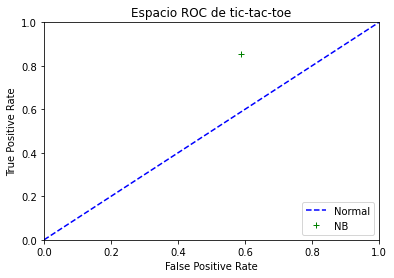


German

Matriz Confusion        Real
           |   1    121.217  32.9
 Estimado  |   0    22.417  31.8


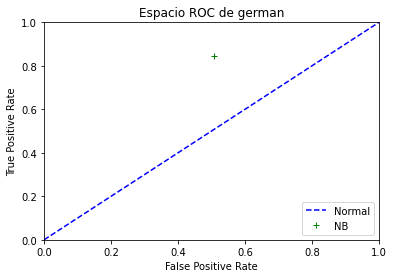

In [16]:
# Calculamos la media de las tasas de val. simple y val. cruzada para la matriz de confusion media
    mx1 = MatrizConfusion()

    # TIC-TAC-TOE
    print("\nTic-Tac-Toe\n")
    tpr, fpr = mx1.matrix_media(media_tp1, media_tp2, media_fp1, media_fp2, 
                    media_tn1, media_tn2, media_fn1, media_fn2)
    plot_points = [[fpr, tpr, 'NB']]
    mx1.plot(plot_points, "tic-tac-toe")

    # GERMAN
    print("\nGerman\n")

    tpr, fpr = mx1.matrix_media(media_tp3, media_tp4, media_fp3, media_fp4, 
                    media_tn3, media_tn4, media_fn3, media_fn4)
    plot_points = [[fpr, tpr, 'NB']]
    mx1.plot(plot_points, "german")

In [17]:
"""
En cuanto a la matriz de confusión, podemos observar que en ambos casos la clase positiva es mucho más 
abundante en el dataset que la negativa, por tanto los números de la primera fila son más altos. 

Sin embargo, cabe destacar que la cantidad de aciertos en ambas es bastante mayor que el de fallos, 
lo que se traduce en una predicción por encima de la diagonal normal.

Se observa también, que el porcentaje de aciertos/fallos de la clase 1 (positiva) es mucho menor que el de 
la clase 2 (negativa). Esto se debe a que, como se ha mencionado anteriormente, en el dataset existen más 
ejemplos de la primera clase que de la segunda y como consecuencia, el modelo se encuentra mejor entrenado 
en la clase positiva y acierta más en esta.
"""

'\nEn cuanto a la matriz de confusión, podemos observar que en ambos casos la clase positiva es mucho más \nabundante en el dataset que la negativa, por tanto los números de la primera fila son más altos. \n\nSin embargo, cabe destacar que la cantidad de aciertos en ambas es bastante mayor que el de fallos, \nlo que se traduce en una predicción por encima de la diagonal normal.\n\nSe observa también, que el porcentaje de aciertos/fallos de la clase 1 (positiva) es mucho menor que el de \nla clase 2 (negativa). Esto se debe a que, como se ha mencionado anteriormente, en el dataset existen más \nejemplos de la primera clase que de la segunda y como consecuencia, el modelo se encuentra mejor entrenado \nen la clase positiva y acierta más en esta.\n'